In [24]:
from torch.optim.lr_scheduler import CosineAnnealingLR, LinearLR, SequentialLR

class WarmUpCosineAnnealingLR(SequentialLR):
    def __init__(self, optimizer, num_epochs, warmup_epochs, eta_min=0, warmup_decay=0.01, last_epoch=-1):
        self.num_epochs = num_epochs
        self.eta_min = eta_min

        self.warmup_epochs = warmup_epochs
        self.warmup_decay = warmup_decay

        main_scheduler = CosineAnnealingLR(optimizer, T_max=num_epochs - warmup_epochs, eta_min=eta_min)
        warmup_scheduler = LinearLR(optimizer, start_factor=warmup_decay, total_iters=warmup_epochs)
        
        super(WarmUpCosineAnnealingLR, self).__init__(
            optimizer=optimizer, 
            schedulers=[warmup_scheduler, main_scheduler],
            milestones=[warmup_epochs],
            last_epoch=last_epoch,
        )

model = torch.nn.Linear(10, 1)
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

warmup_epochs = 10
num_epochs = 100
scheduler = WarmUpCosineAnnealingLR(optimizer, num_epochs, warmup_epochs)

lrs = []
for epoch in range(num_epochs):
    # Train and validate your model here
    # ...

    # Step the scheduler
    lrs.extend(scheduler.get_last_lr())
    scheduler.step()

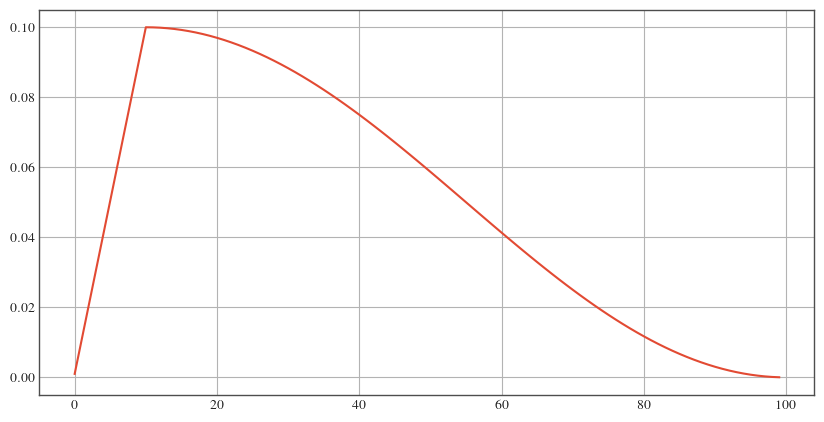

In [25]:
import pylab as plt
plt.plot(lrs)

In [ ]:
print(123)
!ls ~/miniconda3/